In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io
   

from skimage import data
from skimage.metrics import (adapted_rand_error,
                              variation_of_information)
from skimage.filters import sobel
from skimage.measure import label
from skimage.util import img_as_float
from skimage.feature import canny
from skimage.morphology import remove_small_objects
from skimage.segmentation import (morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  watershed,
                                  mark_boundaries)
from skimage import segmentation
from skimage.color import rgb2gray
from skimage import color
from skimage.future import graph

In [19]:
image = io.imread('../data/own/Portulaca_flower_Counting/IMG_20190708_084335.jpg')


In [15]:
elevation_map = sobel(image)
markers = np.zeros_like(image)
markers[image < 30] = 1
markers[image > 150] = 2
im_true = watershed(elevation_map, markers)
im_true = ndi.label(ndi.binary_fill_holes(im_true - 1))[0]

In [16]:
edges = sobel(image)
im_test1 = watershed(edges, markers=468, compactness=0.001)

In [17]:
edges = canny(image)
fill_coins = ndi.binary_fill_holes(edges)
im_test2 = ndi.label(remove_small_objects(fill_coins, 21))[0]

In [18]:
mage = img_as_float(image)
gradient = inverse_gaussian_gradient(image)
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
im_test3 = morphological_geodesic_active_contour(gradient, iterations=100,
                                                 init_level_set=init_ls,
                                                 smoothing=1, balloon=-1,
                                                 threshold=0.69)
im_test3 = label(im_test3)

method_names = ['Compact watershed', 'Canny filter',
                'Morphological Geodesic Active Contours']
short_method_names = ['Compact WS', 'Canny', 'GAC']

precision_list = []
recall_list = []
split_list = []
merge_list = []


fig, axes = plt.subplots(2, 3, figsize=(9, 6), constrained_layout=True)
ax = axes.ravel()

ax[2].imshow(mark_boundaries(image, im_true))
ax[2].set_title('True Segmentation')
ax[2].set_axis_off()

ax[3].imshow(mark_boundaries(image, im_test1))
ax[3].set_title('Compact Watershed')
ax[3].set_axis_off()

ax[4].imshow(mark_boundaries(image, im_test2))
ax[4].set_title('Edge Detection')
ax[4].set_axis_off()

ax[5].imshow(mark_boundaries(image, im_test3))
ax[5].set_title('Morphological GAC')
ax[5].set_axis_off()

plt.show()

KeyboardInterrupt: 

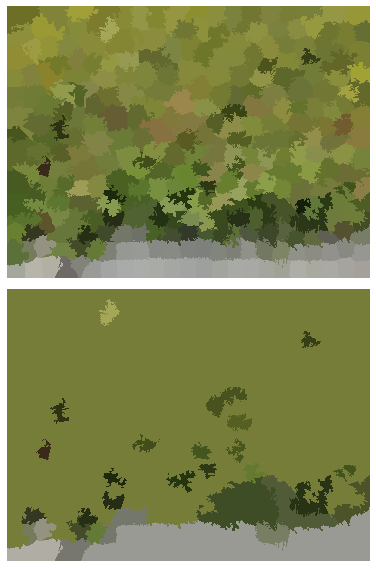

In [26]:
img = image
labels1 = segmentation.slic(img, compactness=30, n_segments=400)
out1 = color.label2rgb(labels1, img, kind='avg')

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg')

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

In [27]:
from skimage.exposure import histogram

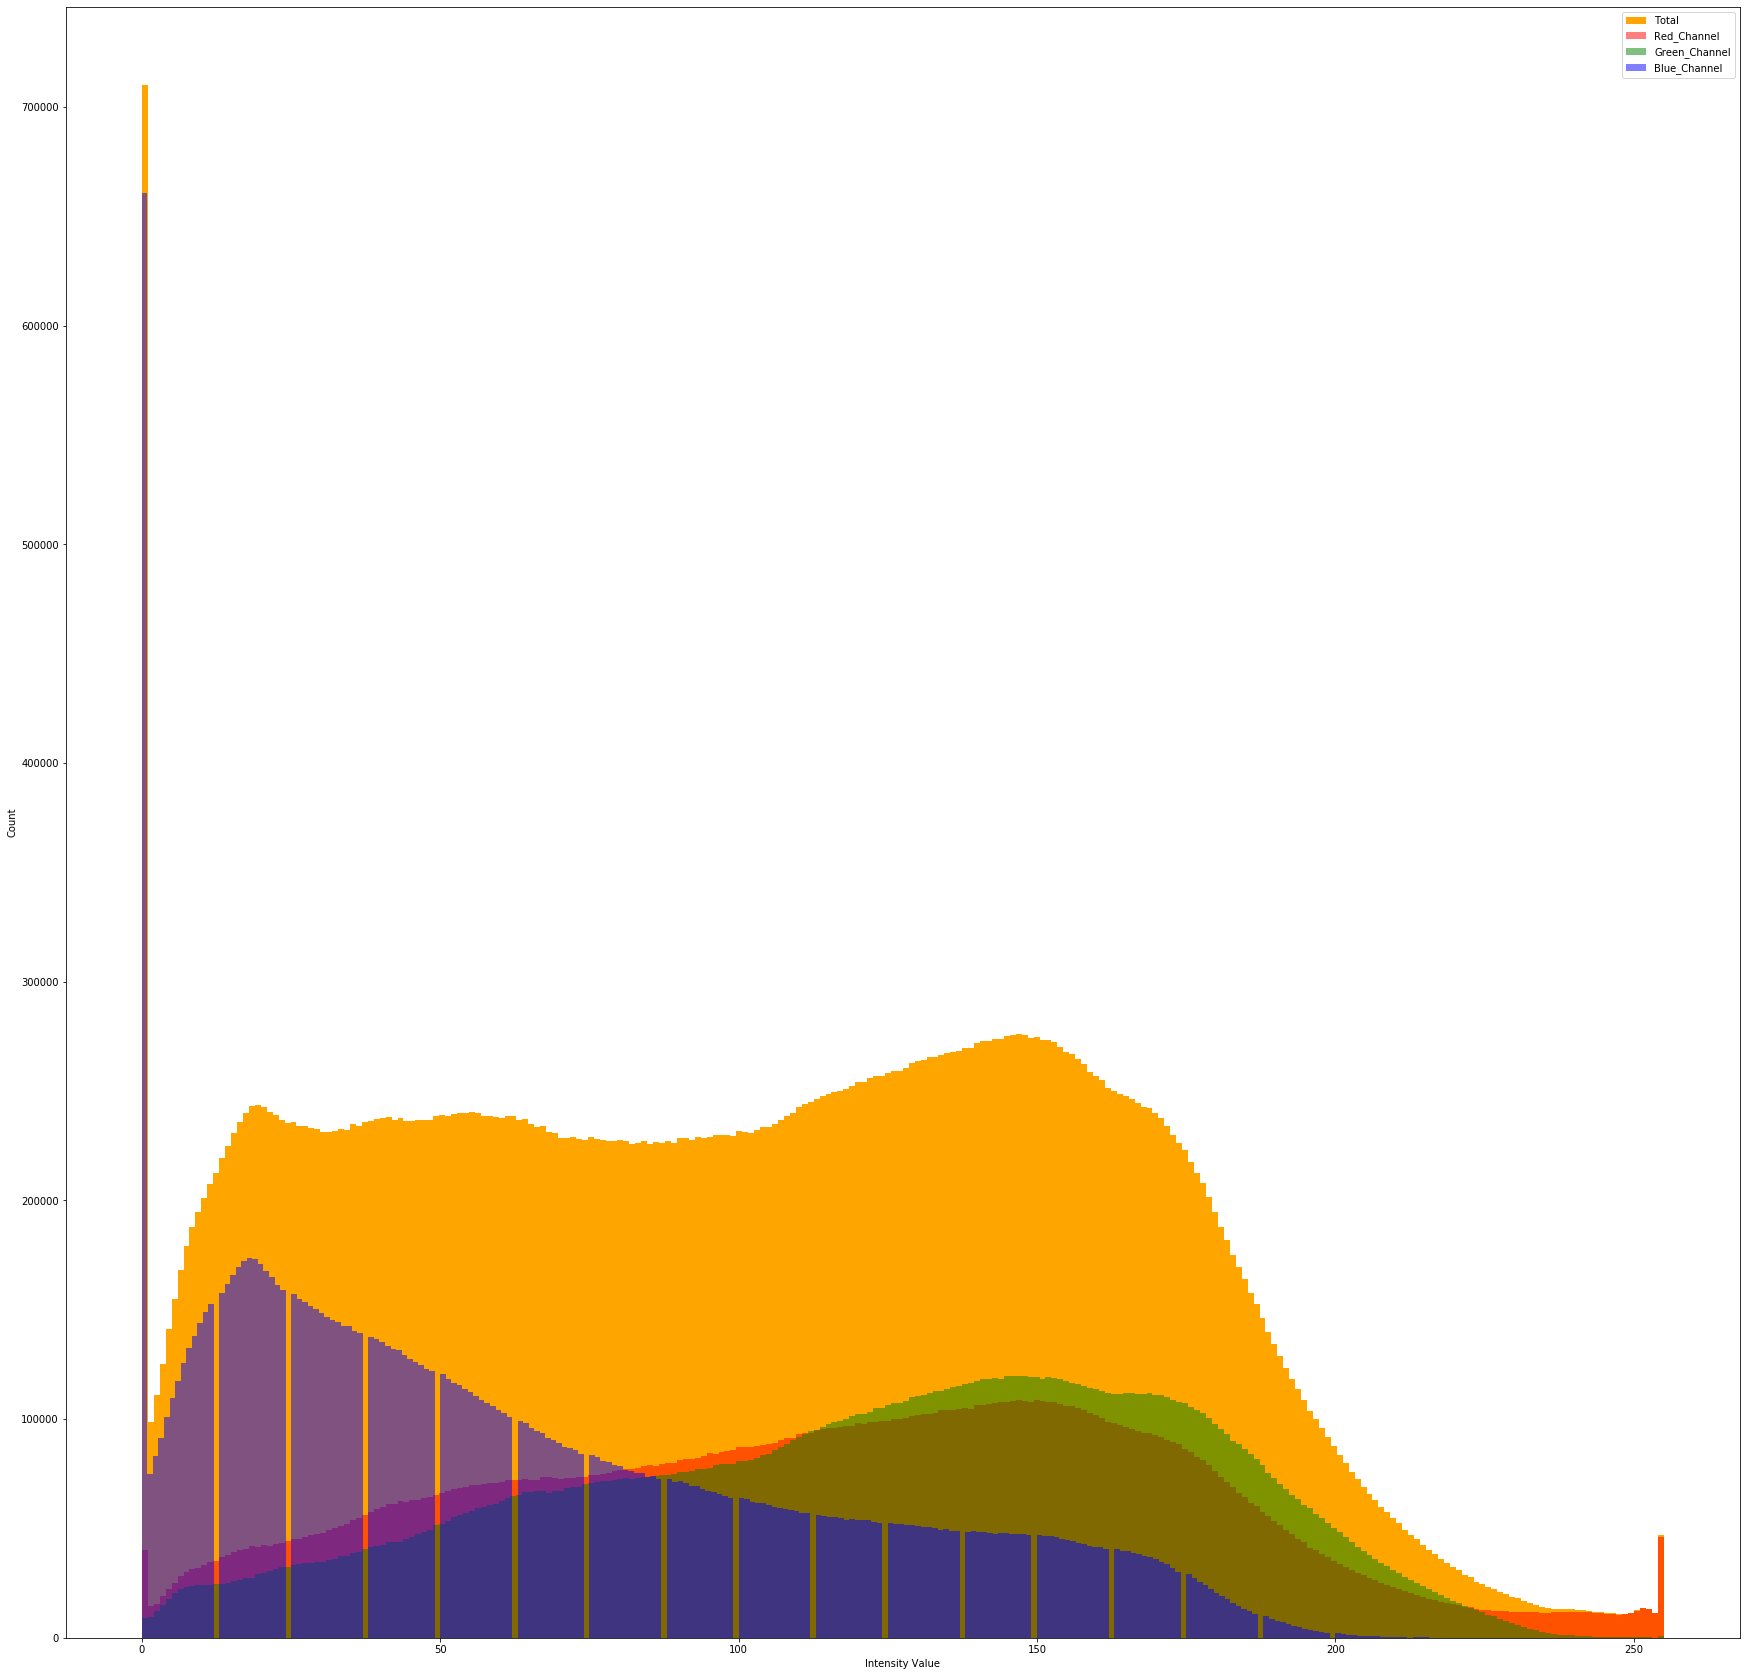

In [46]:
plt.figure(figsize = (30,30))
_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

In [36]:
img.shape

(3456, 4608, 3)